# Analysis of Glycolysis and PPP

In [1]:
import sys
sys.path.insert(0, '/home/ubuntu/pySBFitter')
sys.path

['/home/ubuntu/pySBFitter',
 '/home/ubuntu/km_test',
 '/home/ubuntu/pySBFitter',
 '',
 '/home/ubuntu/km_test/km/lib/python3.6/site-packages',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/home/ubuntu/km_test/km/lib/python3.6/site-packages/IPython/extensions',
 '/home/ubuntu/.ipython']

In [2]:
import tellurium as te
import matplotlib.pyplot as plt
from pySBFitter.namedTimeseries import NamedTimeseries, TIME
from pySBFitter.timeseriesPlotter import TimeseriesPlotter

## Functions

In [3]:
def mk_local_path(model_num, is_xml=True, version=None):
    num_str = "%03d" % model_num
    if version is not None:
        is_xml = False
    if version is None:
        version = ""
    else:
        version = "-%d" % version
    if is_xml:
        suffix = "_url.xml"
    else:
        suffix = ".ant"
    return "BIOMD0000000%s%s%s" % (num_str, version, suffix)

In [4]:
def mk_biomodels_path(model_num):
    num_str = "%03d" % model_num
    return "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000%s?filename=BIOMD0000000%s_url.xml" % (num_str, num_str)

In [5]:
# Extracting a model from Antimony
def mk_antimony_file(model_num):
    sbml_path = mk_biomodels_path(model_num)
    local_path = mk_local_path(model_num, is_xml=False)
    print ("** Creating file %s" % local_path)
    rr = te.loadSBMLModel(sbml_path)
    model = (rr.getAntimony())
    with open(local_path, "w") as fd:
        fd.writelines(model)

In [56]:
def simulate(model_num, version=None, sim_time=100, is_xml=True):
    if version is not None:
        is_xml = False
    if is_xml:
        path = mk_biomodels_path(model_num)
        rr = te.loadSBMLModel(path)
    else:
        path = mk_local_path(model_num, is_xml=is_xml , version=version)
        with open(path, "r") as fd:
            model_str = fd.read()
        rr = te.loada(model_str)
    data = rr.simulate(0, sim_time, sim_time)
    data_ts = NamedTimeseries(namedArray=data)
    plotter = TimeseriesPlotter()
    plotter.plotTimeSingle(data_ts, numCol=8, figsize=(16, 10), titlePosition=(0.6, 1), title="")
    return data_ts

In [7]:
mk_local_path(503, is_xml=True, version=1)

'BIOMD0000000503-1.ant'

In [14]:
simulate(503, version=1 )

RuntimeError: std::exception

## Plots of Models

*** Model 503***
** Creating file BIOMD0000000503.ant


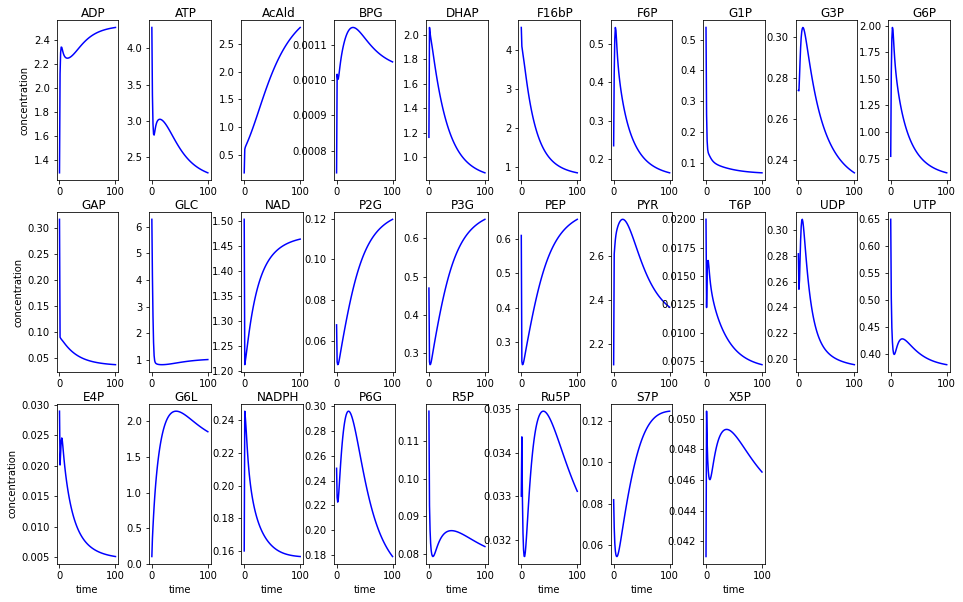

*** Model 510***
** Creating file BIOMD0000000510.ant


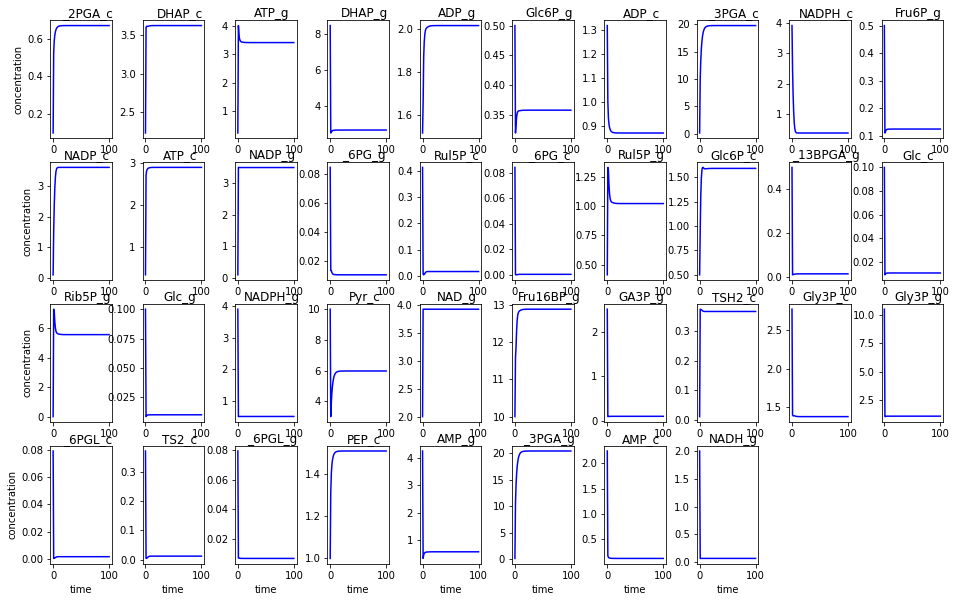

*** Model 511***
** Creating file BIOMD0000000511.ant


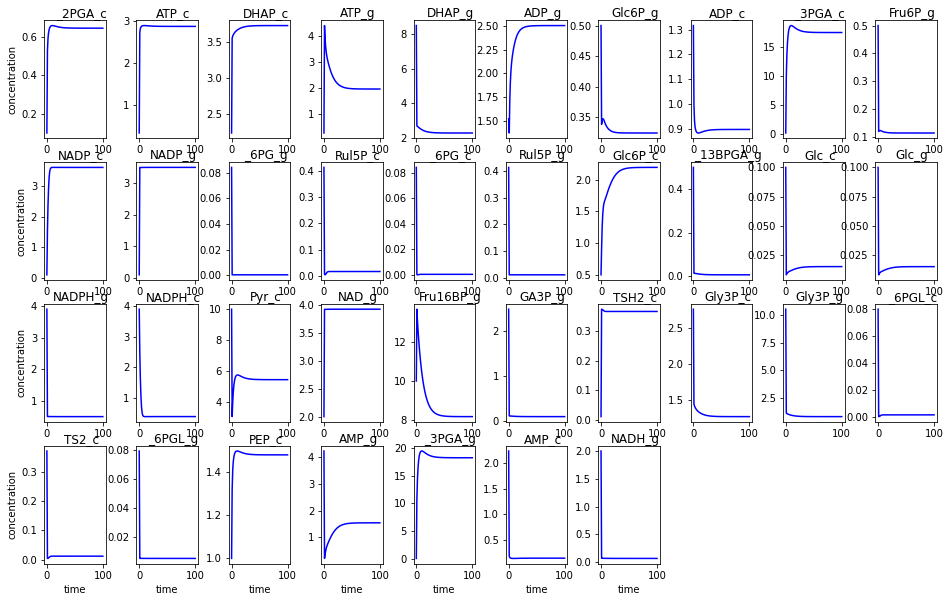

*** Model 513***
** Creating file BIOMD0000000513.ant


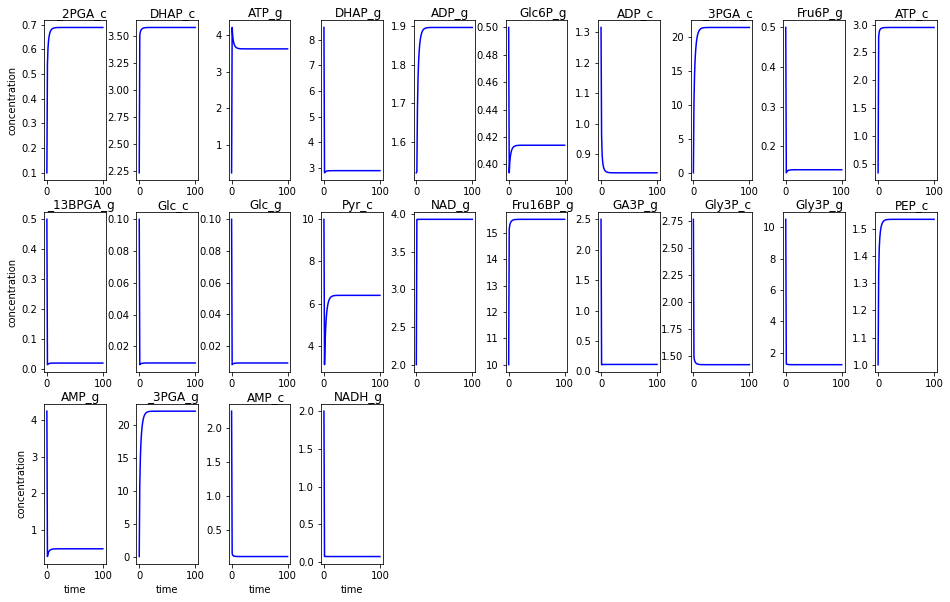

*** Model 514***
** Creating file BIOMD0000000514.ant


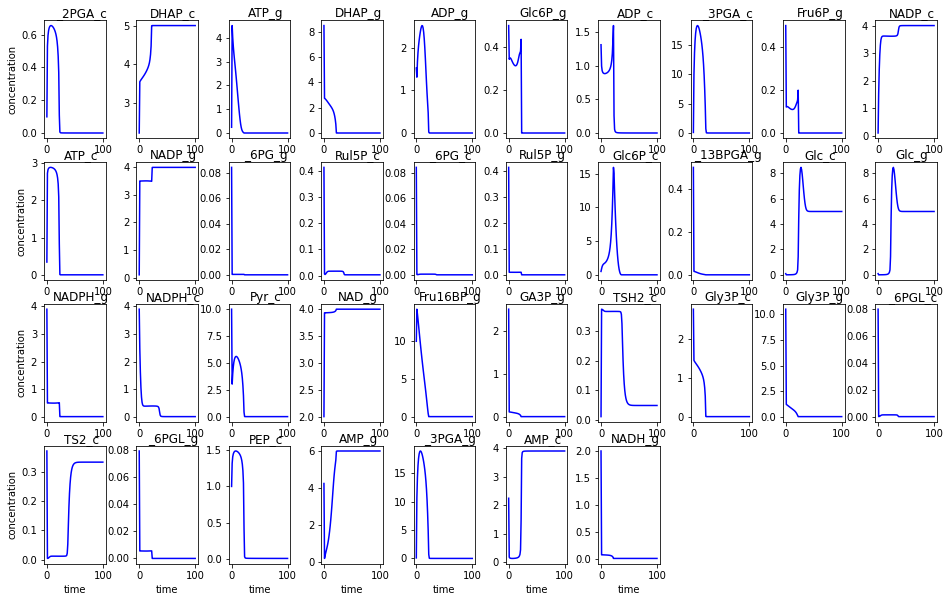

*** Model 515***
** Creating file BIOMD0000000515.ant


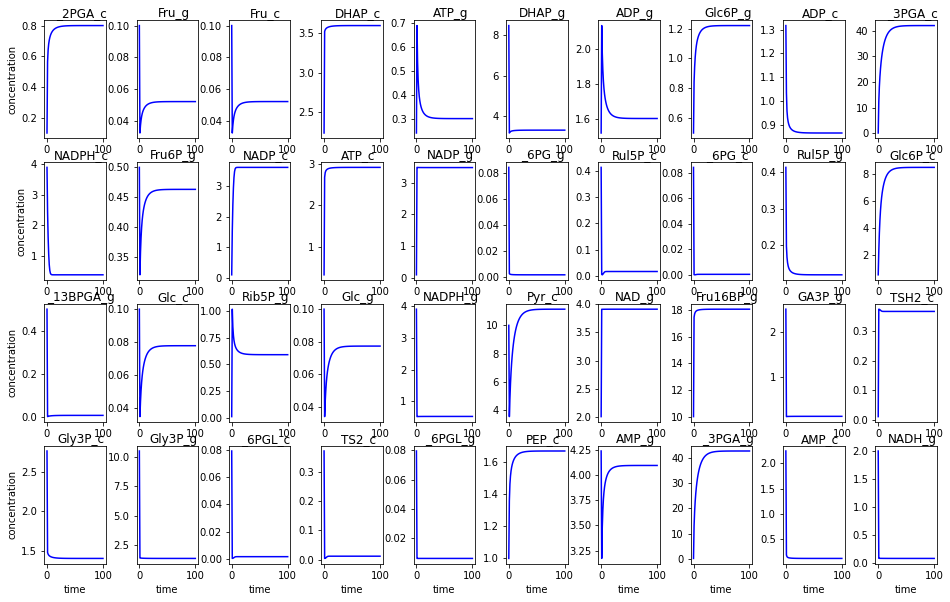

*** Model 516***
** Creating file BIOMD0000000516.ant


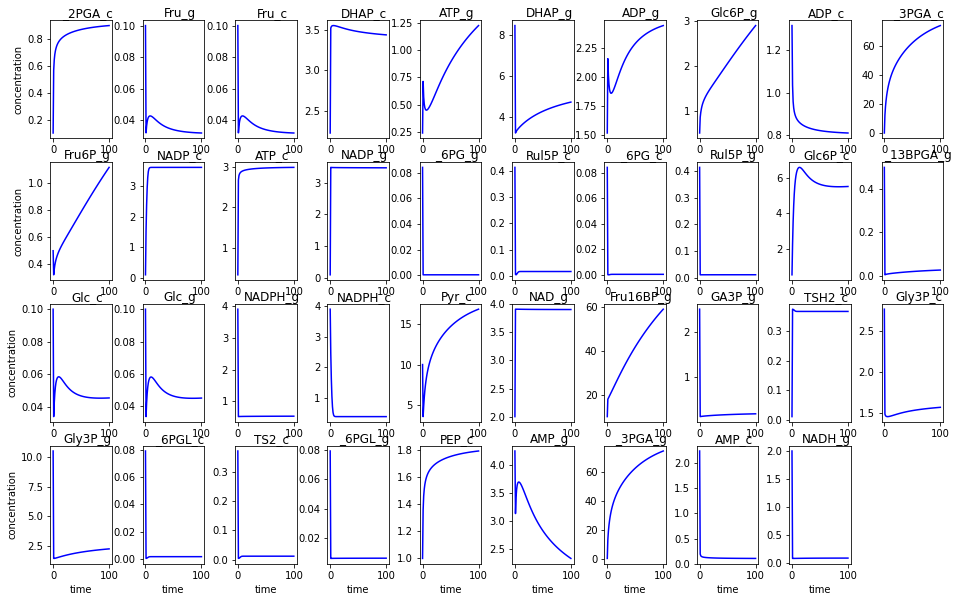

In [9]:
model_nums = [503, 510, 511, 513, 514, 515, 516]
for model_num in model_nums:
    print("*** Model %d***" % model_num)
    mk_antimony_file(model_num)
    simulate(model_num)

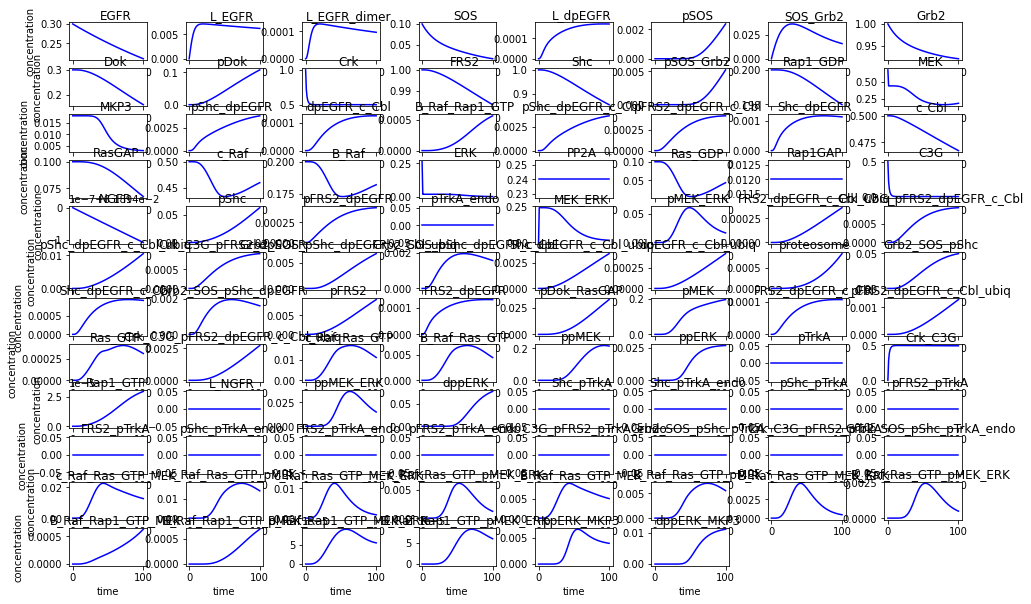

** Creating file BIOMD0000000049.ant


In [22]:
model_num = 49
simulate(model_num)
mk_antimony_file(model_num)

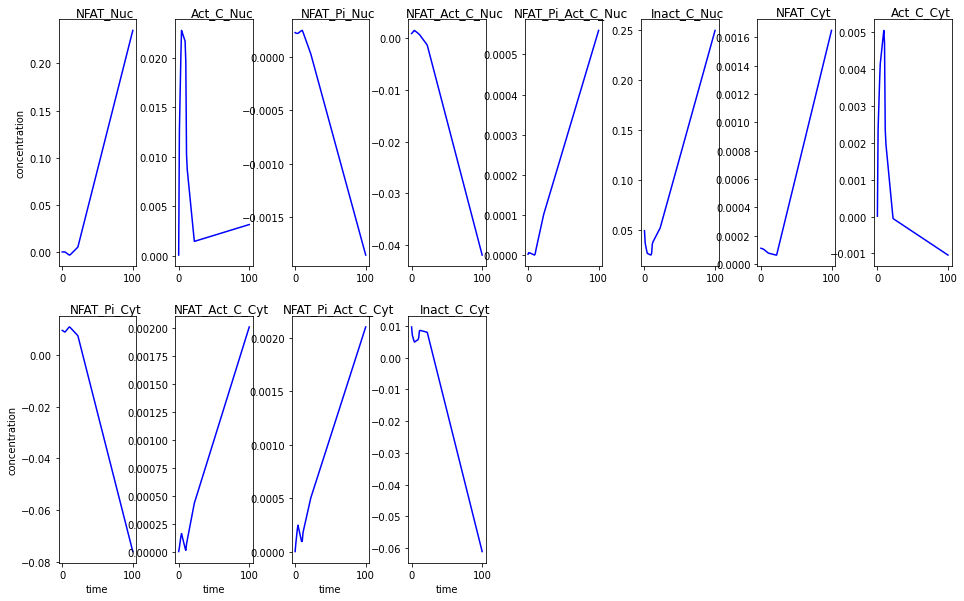

** Creating file BIOMD0000000122.ant


In [65]:
model_num = 122
data_ts = simulate(model_num)
mk_antimony_file(model_num)

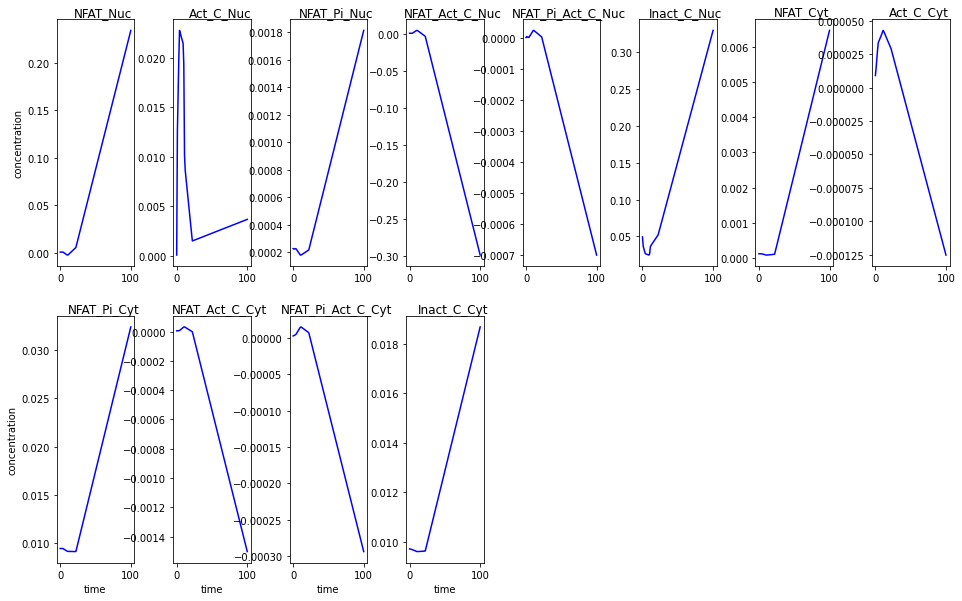

In [66]:
# This version of the model excludes the following reaction:
#  R13: 3 $Ca_Cyt + Inact_C_Cyt -> Act_C_Cyt; cytosol*(k19*Inact_C_Cyt*Ca_Cyt^3 - k20*Act_C_Cyt)
# Without this reaction, there is creation of activated CN in the cytosol.
# The species that should be unaffected are: Act_C_Nuc (since no transport from Cyt to Nucleus)
model_num = 122
datap_ts = simulate(model_num, version=1)

**Observations**
1. Focus on change in behaviour of Inact_C_Cyt since this changes its monotonicity.
1. Justify same behavior for a couple of curves

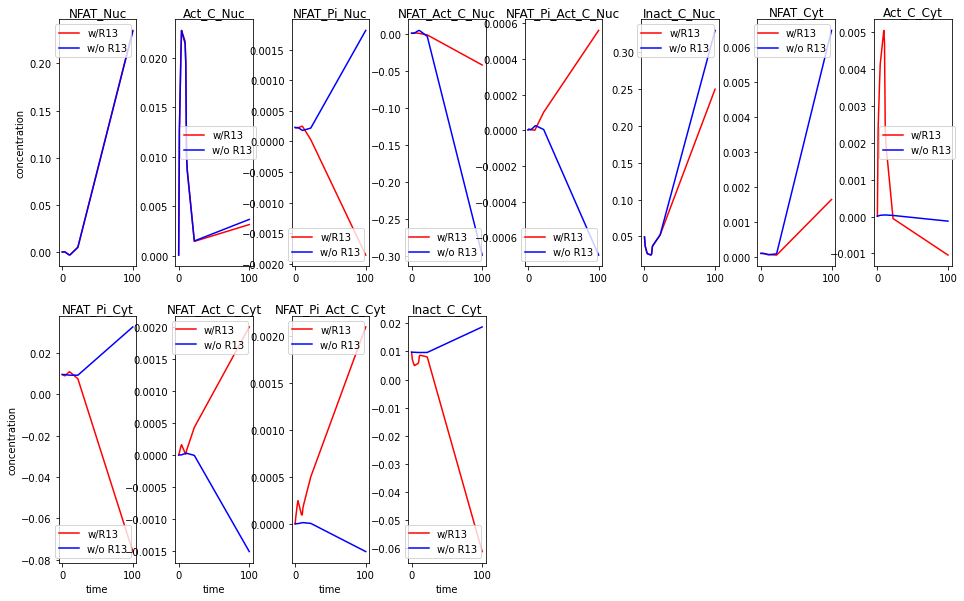

In [71]:
plotter = TimeseriesPlotter()
plotter.plotTimeSingle(data_ts, timeseries2=datap_ts, legend=["w/R13", "w/o R13"], numCol=8, color=["r", "b"], figsize=(16, 10))